# Plotting NWS Precipitation Data

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4
from geopy.geocoders import Nominatim
import pyproj

def plot_conus():
    """ Create a plot of the Continential US. """
    m = Basemap(
        llcrnrlon=-100.0,
        llcrnrlat=25.0,
        urcrnrlon=-88.0,
        urcrnrlat=33.0,
        projection='mill',
        resolution='i')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    
    cities = [["Houston",10]]
    scale = 2
    geolocator = Nominatim()
    for (city,count) in cities:
        loc = geolocator.geocode(city)
        x, y = m(loc.longitude, loc.latitude)
        m.plot(x, y, marker='o',color='Black',markersize=int(np.sqrt(count))*scale)
    return m

# Colorbar with NSW Precip colors
nws_precip_colors = [
    "#04e9e7",  # 0.01 - 0.10 inches
    "#019ff4",  # 0.10 - 0.25 inches
    "#0300f4",  # 0.25 - 0.50 inches
    "#02fd02",  # 0.50 - 0.75 inches
    "#01c501",  # 0.75 - 1.00 inches
    "#008e00",  # 1.00 - 1.50 inches
    "#fdf802",  # 1.50 - 2.00 inches
    "#e5bc00",  # 2.00 - 2.50 inches
    "#fd9500",  # 2.50 - 3.00 inches
    "#fd0000",  # 3.00 - 4.00 inches
    "#d40000",  # 4.00 - 5.00 inches
    "#bc0000",  # 5.00 - 6.00 inches
    "#f800fd",  # 6.00 - 8.00 inches
    "#9854c6",  # 8.00 - 10.00 inches
]
precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

In [2]:
dset = netCDF4.Dataset('nws_precip_last7days_20170829_conus.nc')

# compute normal lats and lons 

x=np.array(dset.variables['x'][:])
y=np.array(dset.variables['y'][:])

xv, yv = np.meshgrid(x, y)

p = pyproj.Proj("+proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +k=90 +x_0=0 +y_0=0 +a=6371200 +b=6371200 +units=m +no_defs")
lons, lats = p(xv, yv, inverse=True)

# read in the data, convert in inches
precip = dset.variables['observation'][:]
precip_in = np.ma.masked_less(precip*25.40, 10)

percent=dset.variables['percent_of_normal'][:]

/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


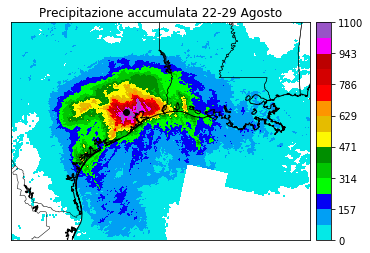

In [3]:
# plot the data
m = plot_conus()

levels = np.linspace(0, 1100, 15)
norm = matplotlib.colors.BoundaryNorm(levels, 14)
cax = m.pcolormesh(lons, lats, precip_in, latlon=True, norm=norm,
                   cmap=precip_colormap)
m.colorbar(cax)

plt.title('Precipitazione accumulata 22-29 Agosto')
plt.savefig('conus_plot_precip.png', dpi=150)
plt.show()

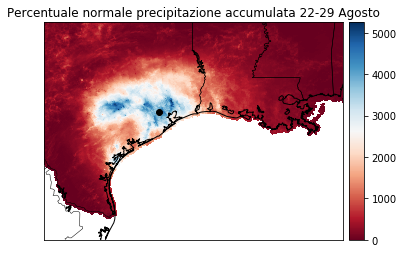

In [9]:
# plot the data
m = plot_conus()

cax = m.pcolormesh(lons, lats, percent, latlon=True, cmap='RdBu')
m.colorbar(cax)

plt.title('Percentuale normale precipitazione accumulata 22-29 Agosto')
plt.savefig('conus_plot_percent.png', dpi=150)
plt.show()